In [4]:
tags = pd.read_csv(path + 'tags.csv')
tags.shape

(465564, 4)

In [5]:
ratings = pd.read_csv(path + 'ratings.csv')
ratings.shape

(20000263, 4)

In [6]:
links = pd.read_csv(path + 'links.csv')
links.shape

(27278, 3)

In [7]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [9]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [10]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [12]:
# List of genres as a Python list 
genres = ['Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']

In [14]:
genres_rating_list = []

In [21]:
# The loop reads each element of the above list
    # For each iteration, one genre is selected from the movies data frame
    # This selection of the data frame is then merged with the rating data frame to get the rating for that genre
    # Once the new merged data frame is created, we use the mean function to get the mean rating for the genre
    # The genre and the corresponding mean rating are then appended to the genres_rating Data Frame
    # The entire looping takes long - can certainly be optimized for performance
 
for i in range(len(genres)):
    fil = genres[i]+'_filter'
    mov = genres[i]+'_movies'
    rat = genres[i]+'_ratings'
    rat_mean = rat+'_mean'
    fil = movies['genres'].str.contains(genres[i])
    mov = movies[fil]
    rat = mov.merge(ratings, on='movieId', how='inner')
    rat_mean = round(rat['rating'].mean(), 2)
    #print(genres[i], round(rat_mean,2))
    genres_rating_list.append(rat_mean)

In [16]:
df = {'Genre':genres, 'Genres Mean Rating':genres_rating_list}

In [17]:
genres_rating = pd.DataFrame(df)

In [18]:
genres_rating

,Genre,Genres Mean Rating
0,Action,3.44
1,Adventure,3.50
2,Animation,3.62
3,Children,3.41
4,Comedy,3.43
5,Crime,3.67
6,Documentary,3.74
7,Drama,3.67
8,Fantasy,3.51
9,Film-Noir,3.97


In [22]:
genres_rating['Genres Standard Deviation'] = genres_rating['Genres Mean Rating'].std()

In [24]:
genres_rating['Mean'] = genres_rating['Genres Mean Rating'].mean()
genres_rating['Zero'] = 0

In [25]:
genres_rating

,Genre,Genres Mean Rating,Genres Standard Deviation,Mean,Zero
0,Action,3.44,0.163244,3.573889,0
1,Adventure,3.50,0.163244,3.573889,0
2,Animation,3.62,0.163244,3.573889,0
3,Children,3.41,0.163244,3.573889,0
4,Comedy,3.43,0.163244,3.573889,0
5,Crime,3.67,0.163244,3.573889,0
6,Documentary,3.74,0.163244,3.573889,0
7,Drama,3.67,0.163244,3.573889,0
8,Fantasy,3.51,0.163244,3.573889,0
9,Film-Noir,3.97,0.163244,3.573889,0


In [26]:
overall_mean = round(genres_rating['Genres Mean Rating'].mean(), 2)
overall_std = round(genres_rating['Genres Mean Rating'].std(),2)
scifi_rating = genres_rating[genres_rating['Genre'] == 'Sci-Fi']['Genres Mean Rating']

In [28]:
overall_mean

3.57

In [29]:
overall_std

0.16

In [30]:
scifi_rating

14    3.44
Name: Genres Mean Rating, dtype: float64

In [31]:
genres_rating['Diff from Mean'] = genres_rating['Genres Mean Rating'] - overall_mean

In [32]:
genres_rating

,Genre,Genres Mean Rating,Genres Standard Deviation,Mean,Zero,Diff from Mean
0,Action,3.44,0.163244,3.573889,0,-0.13
1,Adventure,3.50,0.163244,3.573889,0,-0.07
2,Animation,3.62,0.163244,3.573889,0,0.05
3,Children,3.41,0.163244,3.573889,0,-0.16
4,Comedy,3.43,0.163244,3.573889,0,-0.14
5,Crime,3.67,0.163244,3.573889,0,0.10
6,Documentary,3.74,0.163244,3.573889,0,0.17
7,Drama,3.67,0.163244,3.573889,0,0.10
8,Fantasy,3.51,0.163244,3.573889,0,-0.06
9,Film-Noir,3.97,0.163244,3.573889,0,0.40


In [33]:
genre_list = list(genres_rating['Genre'])

In [34]:
genre_list

['Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [35]:
genres_rating_list = list(genres_rating['Genres Mean Rating'])
genres_diff_list = list(genres_rating['Diff from Mean'])

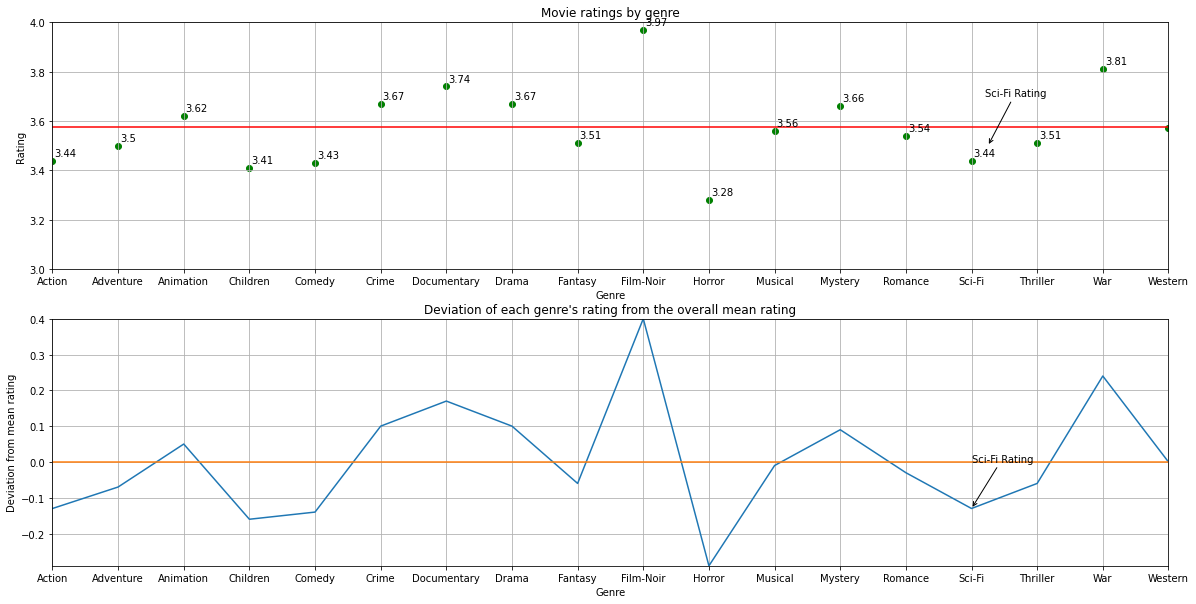

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

ax1 = plt.subplot(2,1,1)
x = [x for x in range(0, 18)]
xticks_genre_list = genre_list
y = genres_rating_list
plt.xticks(range(len(x)), xticks_genre_list)
plt.scatter(x,y, color='g')
plt.plot(x, genres_rating['Mean'], color="red")
plt.autoscale(tight=True)
#plt.rcParams["figure.figsize"] = (10,2)
plt.title('Movie ratings by genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.ylim(ymax = 4, ymin = 3)
plt.grid(True)
plt.savefig(r'movie-ratings-by-genre.png')

plt.annotate("Sci-Fi Rating",
            xy=(14.25,3.5), xycoords='data',
            xytext=(14.20, 3.7), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

for i,j in enumerate( y ):
    ax1.annotate( j, ( x[i] + 0.03, y[i] + 0.02))

ax2 = plt.subplot(2,1,2)
x = [x for x in range(0, 18)]
xticks_genre_list = genre_list
y = genres_rating['Diff from Mean']
plt.xticks(range(len(x)), xticks_genre_list)
plt.plot(x,y)
plt.plot(x, genres_rating['Zero'])
plt.autoscale(tight=True)
#plt.rcParams["figure.figsize"] = (10,2)
plt.title('Deviation of each genre\'s rating from the overall mean rating')
plt.xlabel('Genre')
plt.ylabel('Deviation from mean rating')
plt.grid(True)
plt.savefig(r'deviation-from-mean-rating.png')

plt.annotate("Sci-Fi Rating",
            xy=(14,-0.13), xycoords='data',
            xytext=(14.00, 0.0), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )


plt.show()

In [43]:
# extract year of release of each movie from the title column
# convert the data type of the movie_year column to numeric (from str)

import numpy as np
import re

movies['movie_year'] = movies['title']

movies['movie_year'] = movies['movie_year'].str.extract(r"\(([0-9]+)\)", expand=False)

# creating a new column with just the movie titles
movies['title_only'] = movies['title']
movies['title_only'] = movies['title_only'].str.extract('(.*?)\s*\(', expand=False)

In [45]:
movies['movie_year'].fillna(0, inplace=True)

In [46]:
#Drop all rows containing incorrect year values - such as 0, 6, 69, 500 and -2147483648
movies.drop(movies[movies.movie_year == '0'].index, inplace=True)
movies.drop(movies[movies.movie_year == '6'].index, inplace=True)
movies.drop(movies[movies.movie_year == '06'].index, inplace=True)
movies.drop(movies[movies.movie_year == '69'].index, inplace=True)
movies.drop(movies[movies.movie_year == '500'].index, inplace=True)
movies.drop(movies[movies.movie_year == '-2147483648'].index, inplace=True)

movies.drop(movies[movies.movie_year == 0].index, inplace=True)
movies.drop(movies[movies.movie_year == 6].index, inplace=True)
movies.drop(movies[movies.movie_year == 69].index, inplace=True)
movies.drop(movies[movies.movie_year == 500].index, inplace=True)
movies.drop(movies[movies.movie_year == -2147483648].index, inplace=True)

In [47]:
#convert the string values to numeric
movies['movie_year'] = pd.to_datetime(movies['movie_year'], format='%Y')

In [48]:
movie_year = pd.DataFrame(movies['title_only'].groupby(movies['movie_year']).count())

In [49]:
movie_year.reset_index(inplace=True)

In [50]:
X=movie_year['movie_year']
Y=movie_year['title_only']

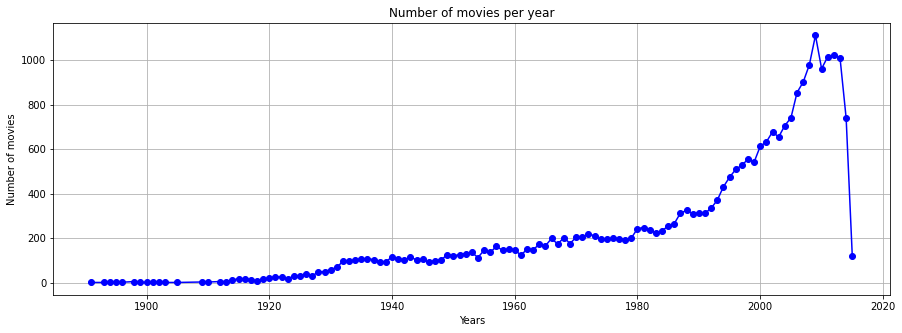

In [54]:
plt.plot_date(X,Y,'bo-')
plt.grid(True)
plt.rcParams["figure.figsize"] = (15,5)
plt.title('Number of movies per year')
plt.xlabel('Years')
plt.ylabel('Number of movies')
# plt.xlim('1885-01-01','2020-01-01')
plt.show()

In [55]:
movies.head()

,movieId,title,genres,movie_year,title_only
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995-01-01,Toy Story
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995-01-01,Jumanji
2,3,Grumpier Old Men (1995),Comedy|Romance,1995-01-01,Grumpier Old Men
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995-01-01,Waiting to Exhale
4,5,Father of the Bride Part II (1995),Comedy,1995-01-01,Father of the Bride Part II


In [56]:
list(movies)

['movieId', 'title', 'genres', 'movie_year', 'title_only']

In [57]:
a = pd.Series(movies.iloc[0])

In [58]:
a

movieId                                                 1
title                                    Toy Story (1995)
genres        Adventure|Animation|Children|Comedy|Fantasy
movie_year                            1995-01-01 00:00:00
title_only                                      Toy Story
Name: 0, dtype: object

In [59]:
def flat(str1):
    c = pd.DataFrame(columns=list(movies))
    for i in range(len(str1)):
        #print(str1[i])
        if i == 2:
            a = str1[i].split('|')
    for j in range(len(a)):
        c.loc[j] = [str1[0], str1[1], a[j], str1[3], str1[4]]
    return c

In [60]:
c = flat(a)

In [61]:
c

,movieId,title,genres,movie_year,title_only
0,1,Toy Story (1995),Adventure,1995-01-01,Toy Story
1,1,Toy Story (1995),Animation,1995-01-01,Toy Story
2,1,Toy Story (1995),Children,1995-01-01,Toy Story
3,1,Toy Story (1995),Comedy,1995-01-01,Toy Story
4,1,Toy Story (1995),Fantasy,1995-01-01,Toy Story
